In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


### Preprocessing

In [3]:
# rename the column
df = df.rename(columns={
    'Gender':'gender',
    'Age':'age',
    'Annual Income (k$)':'annual_income',
    'Spending Score (1-100)':'spending_score'
})

df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
# change the categorical data to numerical 
df['gender'].replace(['Female','Male'],[0,1], inplace=True)
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [5]:
# drop not used column 
x = df.drop(['CustomerID', 'gender'], axis=1)
x.head(3)

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6


### Training the model

In [6]:
from sklearn.cluster import KMeans

# make list containing inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

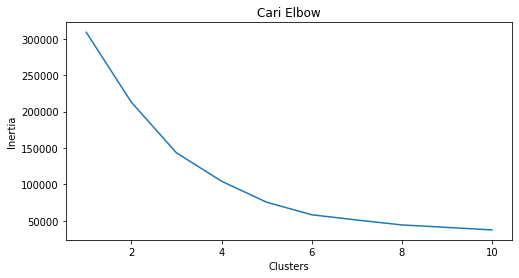

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y =clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

from this graphic, we can see that k = 5 doesnt decrease sigificantly

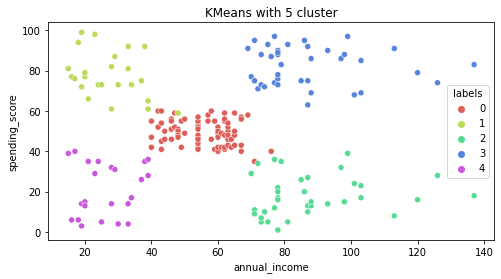

In [8]:
# make KMeans object
km5 = KMeans(n_clusters=5).fit(x)

# making label column in dataset
x['labels'] = km5.labels_

# making plot with 5 cluster
plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y= x['spending_score'], hue=x['labels'], palette=sns.color_palette('hls',5))
plt.title('KMeans with 5 cluster')
plt.show()